In [12]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import m1
from ordered_set import OrderedSet
import timeit
import matplotlib.pyplot as plt

def walkthrough_1():
    cleaned_description = m1.get_and_clean_data()

    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    stop_dict = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

    return stemmed_description


def m2_elapsed_experiment_set(n_col):
    cleaned_description = m1.get_and_clean_data()[:n_col]

    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    stop_dict = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])
    return stemmed_description


In [27]:
def m2_elapsed_experiment_list(n_col):
    cleaned_description = m1.get_and_clean_data()[:n_col]

    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    stop_dict = list(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: [word for word in s if word not in stop_dict])
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])
    return stemmed_description

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
stemmed_description = walkthrough_1()
cv = CountVectorizer(analyzer=lambda x: x)
X = cv.fit_transform(stemmed_description)
print(pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out()))
print(X.tocsr()[0, :])
XX = X.toarray()


     aa  aaa  aadairstrategicstaffcom  aaeeo  aampt  aapeeo  aau  ab  abap  \
0     0    0                        0      0      0       0    0   0     0   
1     0    0                        0      0      0       0    0   0     0   
2     0    0                        0      0      0       0    0   0     0   
3     0    0                        0      0      0       0    0   0     0   
4     0    0                        0      0      0       0    0   0     0   
..   ..  ...                      ...    ...    ...     ...  ...  ..   ...   
995   0    0                        0      0      0       0    0   0     0   
996   0    0                        0      0      0       0    0   0     0   
997   0    0                        0      0      0       0    0   0     0   
998   0    0                        0      0      0       0    0   0     0   
999   0    0                        0      0      0       0    0   0     0   

     abapworkflow  ...  zeromq  zigbe  zip  zipkin  zone  zooke

In [5]:
print(np.shape(np.matmul(X.toarray(), X.toarray().T)))
timeit.timeit(lambda: np.matmul(XX, XX.T), number=1)

(1000, 1000)


3.4124976249877363

In [6]:
print(np.shape(X*X.T))
timeit.timeit(lambda: X*X.T, number=1)

(1000, 1000)


0.046704333974048495

In [7]:
timeit.timeit(lambda: np.matmul(XX, XX.T), number=3)/3

3.4142512639906877

In [8]:
timeit.timeit(lambda: X.todok()*X.T.todok(),number=3)/3

0.15627698600292206

In [9]:
timeit.timeit(lambda: X.tolil()*X.T.tolil(),number=3)/3

0.06793938864332934

In [10]:
timeit.timeit(lambda: X.tocoo()*X.T.tocoo(),number=3)/3

0.05513002766141047

In [11]:
timeit.timeit(lambda: X.tocsc()*X.T.tocsc(),number=3)/3

0.05312065267935395

In [28]:
set_exp = {}
list_exp = {}

for w in range(500, 3001, 500):
    print(w)
    set_exp[w] = timeit.timeit(lambda : m2_elapsed_experiment_set(w), number=1)
    list_exp[w] = timeit.timeit(lambda :m2_elapsed_experiment_list(w), number=1)


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


In [29]:
pd.DataFrame.from_dict(set_exp, orient='index',columns=['set experiment'])

,set experiment
500,3.159356
1000,3.685426
1500,4.440435
2000,5.229452
2500,6.135759
3000,7.145224
3500,8.605086
4000,9.643771
4500,11.208367
5000,12.026084


In [30]:
pd.DataFrame.from_dict(list_exp, orient='index', columns=['list experiment'])

,list experiment
500,11.035794
1000,20.106906
1500,30.474076
2000,39.761486
2500,52.077398
3000,65.496458
3500,82.743964
4000,94.150850
4500,110.898031
5000,125.233885


In [31]:
compare = pd.concat([pd.DataFrame.from_dict(set_exp, orient='index',columns=['set experiment']), pd.DataFrame.from_dict(list_exp, orient='index', columns=['list experiment'])],axis=1)

In [32]:
compare

,set experiment,list experiment
500,3.159356,11.035794
1000,3.685426,20.106906
1500,4.440435,30.474076
2000,5.229452,39.761486
2500,6.135759,52.077398
3000,7.145224,65.496458
3500,8.605086,82.743964
4000,9.643771,94.150850
4500,11.208367,110.898031
5000,12.026084,125.233885


Text(0, 0.5, 'elapsed time (s)')

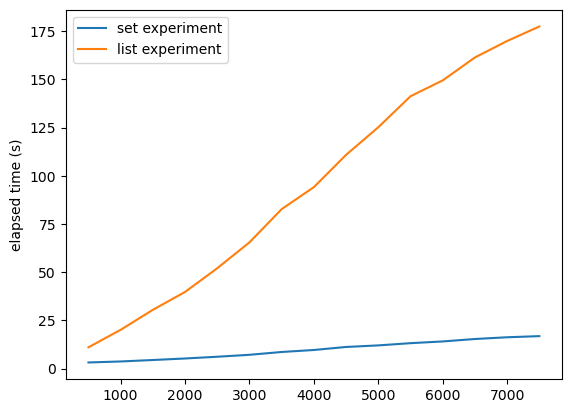

In [33]:
p = compare.plot()
p.set_ylabel('elapsed time (s)')

Text(0, 0.5, 'times (x)')

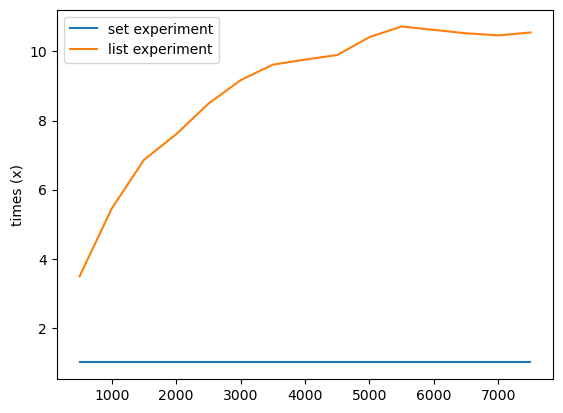

In [34]:
compare['list experiment'] = compare['list experiment'] / compare['set experiment']
compare['set experiment'] = 1
p = compare.plot()
p.set_ylabel('times (x)')

In [35]:
def m2_elapsed_experiment_set_specify_input(cleaned_description):
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    stop_dict = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])
    cv = CountVectorizer(analyzer=lambda s: s)
    X = cv.fit_transform(stemmed_description)

    return stemmed_description

In [36]:
import multiprocessing
import time

[2**i for i in range(int(np.ceil(np.log(multiprocessing.cpu_count()))) + 1)]

[1, 2, 4, 8]

In [37]:
import multiprocessing
import time

cleaned_description = m1.get_and_clean_data()
core_exp = {}

for c in [2**i for i in range(int(np.ceil(np.log(multiprocessing.cpu_count()))) +1)]:
    start = time.time()
    print(c)
    parsed_description_split = np.array_split(cleaned_description, c)
    with multiprocessing.pool.ThreadPool(c) as pool:
        pool.map(m2_elapsed_experiment_set_specify_input, parsed_description_split)
    end = time.time()
    core_exp[c] = end - start


1


/Users/yanwarutsuksawat/anaconda3/envs/se481/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


2
4
8


In [108]:
core_exp

{1: 16.381742238998413,
 2: 13.897526025772095,
 4: 12.546393156051636,
 8: 12.308830976486206}

In [109]:
df = pd.DataFrame.from_dict(core_exp, orient='index', columns=['#cores'])

Text(0, 0.5, 'elapsed time (s)')

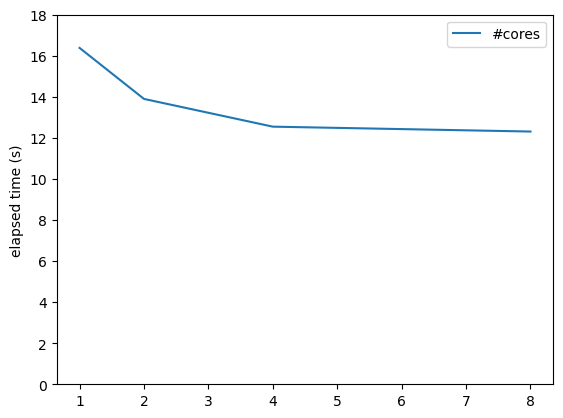

In [110]:
df = pd.DataFrame.from_dict(core_exp, orient='index', columns=['#cores'])
p = df.plot()
p.set_ylim(0, np.ceil(max(df['#cores'])) +1 )
p.set_ylabel('elapsed time (s)')

Text(0, 0.5, 'speedup')

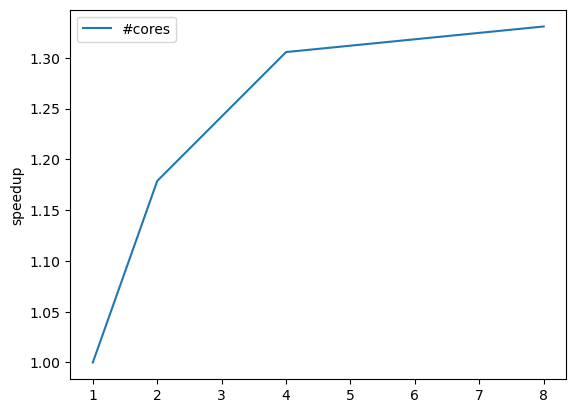

In [111]:
df = df.apply(lambda s: df.loc[1]/s, axis=1)
p = df.plot()
p.set_ylabel('speedup')